### Alunos:

Gustavo Ferreira Lima

Mateus de Almeida Frigo

## Cenário 

Uma  empresa  de  marketing  deseja  segmentar  seus  clientes  para criar campanhas mais 
eficientes.  

Com  base  no  dataset  "marketing_campaign.csv",  contendo  informações como 
idade, renda e hábitos de compra, o(a)s aluno(a)s devem identificar diferentes grupos de 
consumidores, auxiliando na tomada de decisão para campanhas personalizadas.

## 1. Leitura e Tratamento dos Dados (20%)

### Etapa 1: Carregar o dataset "marketing_campaign.csv" usando Pandas

In [2]:
# Importar a biblioteca Pandas para manipulação de dados
import pandas as pd

# 1.1 Carregar o dataset "marketing_campaign.csv" usando Pandas
# Especificar o caminho completo do arquivo no Windows e usar separador de tabulação (\t)
file_path = r'E:\Github\unicamp-engenharia-banco-de-dados\12 - Mineração de Dados\Exercicios\Atividade 2\marketing_campaign.csv'
df = pd.read_csv(file_path, sep='\t')

# Exibir as primeiras linhas para verificar se o dataset foi carregado corretamente
print("Primeiras linhas do dataset:")
print(df.head())

Primeiras linhas do dataset:
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2

### Etapa 2: Exibir informações sobre o dataset

In [3]:
# 1.2 Exibir informações sobre o dataset
# Mostrar informações gerais como número de linhas, colunas, tipos de dados e valores ausentes
print("\nInformações do dataset:")
print(df.info())

# Exibir o número de linhas e colunas separadamente para clareza
print(f"\nNúmero de linhas: {df.shape[0]}")
print(f"Número de colunas: {df.shape[1]}")

# Verificar a quantidade de valores ausentes por coluna
print("\nValores ausentes por coluna:")
print(df.isnull().sum())


Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurch

### Etapa 3: Tratar valores ausentes e outliers

In [ ]:
# 1.3 Tratar valores ausentes e outliers
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')

# Calcular a mediana da coluna 'Income' para substituir os valores ausentes. 
# A mediana é robusta contra outliers, adequada para distribuições assimétricas como renda
income_median = df['Income'].median()

# Substituir valores ausentes pela mediana sem usar inplace=True
df['Income'] = df['Income'].fillna(income_median)

# Verificar se os valores ausentes foram eliminados
print("\nValores ausentes em 'Income' após tratamento:")
print(df['Income'].isnull().sum())

# --- Tratamento de outliers ---
# Definir uma função para limitar outliers usando o método IQR
def treat_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # Primeiro quartil
    Q3 = df[column].quantile(0.75)  # Terceiro quartil
    IQR = Q3 - Q1  # Intervalo interquartil
    lower_bound = Q1 - 1.5 * IQR  # Limite inferior
    upper_bound = Q3 + 1.5 * IQR  # Limite superior
    df[column] = df[column].clip(lower_bound, upper_bound)  # Ajustar valores fora dos limites
    return df

# Selecionar colunas numéricas para tratar outliers
numeric_cols = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                'MntSweetProducts', 'MntGoldProds']

# Aplicar a função de tratamento de outliers em cada coluna selecionada
for col in numeric_cols:
    df = treat_outliers(df, col)

# Exibir estatísticas descritivas após o tratamento de outliers
print("\nEstatísticas descritivas após tratamento de outliers:")
print(df[numeric_cols].describe())


Valores ausentes em 'Income' após tratamento:
0

Estatísticas descritivas após tratamento de outliers:
              Income     MntWines    MntFruits  MntMeatProducts  \
count    2240.000000  2240.000000  2240.000000      2240.000000   
mean    51865.874554   302.112946    21.679018       150.873214   
std     20936.104821   331.057356    27.257348       178.816658   
min      1730.000000     0.000000     0.000000         0.000000   
25%     35538.750000    23.750000     1.000000        16.000000   
50%     51381.500000   173.500000     8.000000        67.000000   
75%     68289.750000   504.250000    33.000000       232.000000   
max    117416.250000  1225.000000    81.000000       556.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  
count      2240.000000       2240.000000   2240.000000  
mean         32.115848         21.937946     39.487723  
std          40.361485         27.540334     39.927508  
min           0.000000          0.000000      0.000000  
25%    

### Etapa 4: Normalizar atributos numéricos para padronização

In [7]:
# Importar o StandardScaler da biblioteca scikit-learn
from sklearn.preprocessing import StandardScaler

# 1.4 Normalizar atributos numéricos para padronização
# Selecionar colunas numéricas relevantes para o K-Means
features_to_scale = ['Year_Birth', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 
                     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
                     'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Inicializar o StandardScaler para padronizar os dados (média 0, desvio padrão 1)
# Justificativa: K-Means é sensível à escala, e a padronização equaliza a influência das variáveis
scaler = StandardScaler()

# Criar uma cópia do dataframe para os dados normalizados
df_scaled = df.copy()

# Aplicar a normalização nas colunas selecionadas
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Exibir as primeiras linhas dos dados normalizados para verificação
print("\nDados normalizados (primeiras linhas):")
print(df_scaled[features_to_scale].head())


Dados normalizados (primeiras linhas):
   Year_Birth    Income  MntWines  MntFruits  MntMeatProducts  \
0   -0.985345  0.299651  1.005751   2.176816         2.210169   
1   -1.235733 -0.263808 -0.879539  -0.758828        -0.810358   
2   -0.317643  0.943420  0.374300   1.002558        -0.133536   
3    1.268149 -1.204881 -0.879539  -0.648741        -0.732048   
4    1.017761  0.307056 -0.390089   0.782385        -0.183879   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0         2.190303          2.145044      1.215280           0.349414   
1        -0.746320         -0.760435     -0.838900          -0.168236   
2         1.954878         -0.034065      0.062935          -0.685887   
3        -0.548067         -0.687798     -0.863951          -0.168236   
4         0.344072          0.183846     -0.613442           1.384715   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  
0         1.409304             2.510890          -

## 2. Exploração e Visualização dos Dados (20%)

### Etapa 2.1: Criar histogramas para explorar a distribuição de idade e renda dos clientes

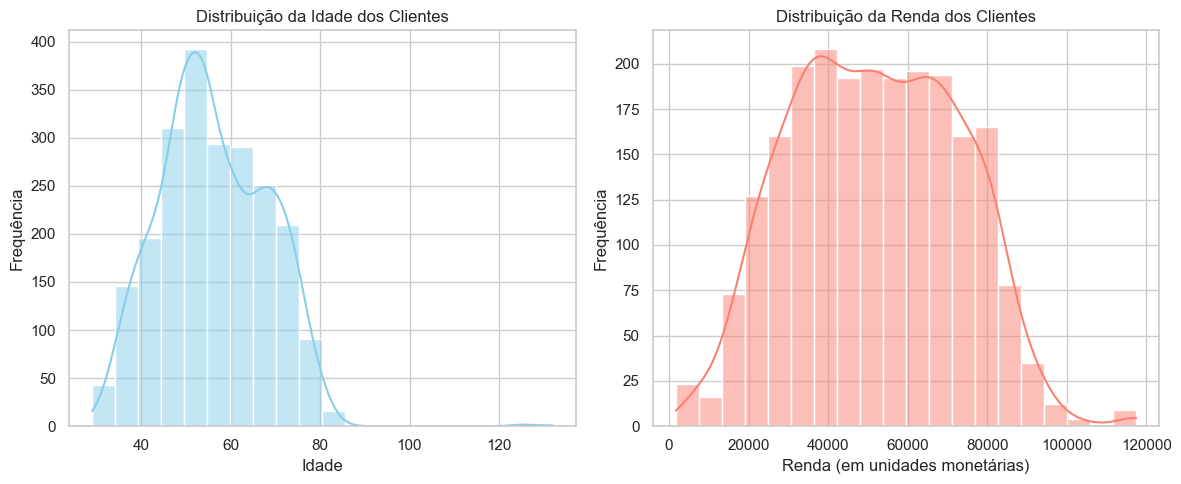

In [8]:
# Importar bibliotecas necessárias para visualização
import matplotlib.pyplot as plt
import seaborn as sns

# 2.1 Criar histogramas para explorar a distribuição de idade e renda dos clientes
# Calcular a idade a partir de 'Year_Birth' (considerando o ano atual como 2025)
df['Age'] = 2025 - df['Year_Birth']

# Configurar o estilo dos gráficos com seaborn
sns.set(style="whitegrid")

# Criar uma figura com dois subplots lado a lado
plt.figure(figsize=(12, 5))

# Histograma da idade
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=20, color='skyblue', kde=True)
plt.title('Distribuição da Idade dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')

# Histograma da renda
plt.subplot(1, 2, 2)
sns.histplot(df['Income'], bins=20, color='salmon', kde=True)
plt.title('Distribuição da Renda dos Clientes')
plt.xlabel('Renda (em unidades monetárias)')
plt.ylabel('Frequência')

# Ajustar layout e exibir os gráficos
plt.tight_layout()
plt.show()

### Etapa 2.2: Criar um gráfico de dispersão entre renda e gasto total

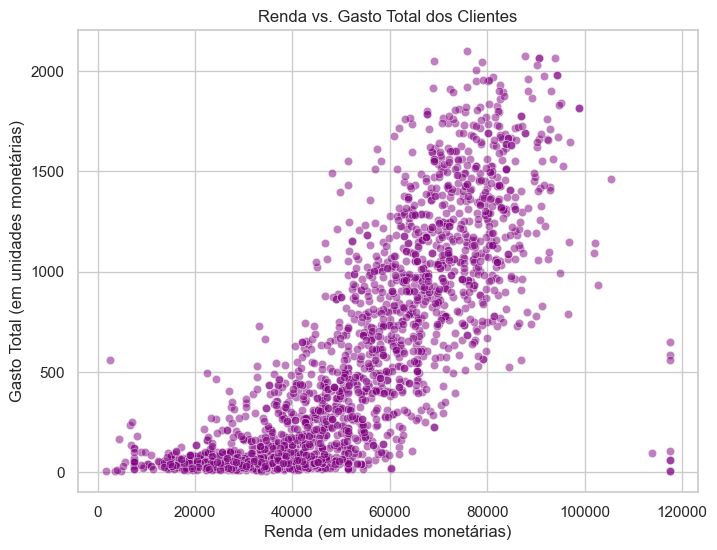

In [9]:
# 2.2 Criar um gráfico de dispersão entre renda e gasto total
# Calcular o gasto total somando as colunas de gastos
df['Total_Spent'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + 
                     df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])

# Criar o gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Total_Spent', data=df, color='purple', alpha=0.5)
plt.title('Renda vs. Gasto Total dos Clientes')
plt.xlabel('Renda (em unidades monetárias)')
plt.ylabel('Gasto Total (em unidades monetárias)')
plt.grid(True)

# Exibir o gráfico
plt.show()

### Etapa 2.3: Utilizar boxplots para visualizar distribuições de consumo em diferentes segmentos

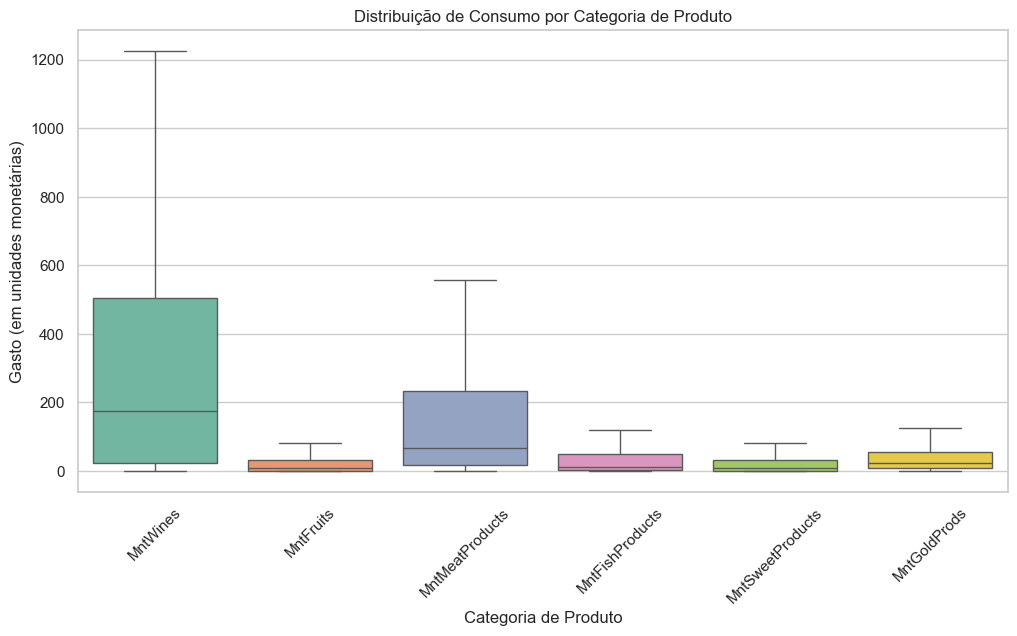

In [10]:
# 2.3 Utilizar boxplots para visualizar distribuições de consumo em diferentes segmentos
# Selecionar colunas de consumo para análise
consumption_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                    'MntSweetProducts', 'MntGoldProds']

# Criar uma figura para os boxplots
plt.figure(figsize=(12, 6))

# Gerar boxplots para as colunas de consumo
sns.boxplot(data=df[consumption_cols], palette='Set2')
plt.title('Distribuição de Consumo por Categoria de Produto')
plt.xlabel('Categoria de Produto')
plt.ylabel('Gasto (em unidades monetárias)')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade

# Exibir o gráfico
plt.show()

## 3. Uso e Execução do Algoritmo de Agrupamento (25%)

### Etapa 3.1: Aplicar o método do cotovelo para determinar o número de clusters (K)

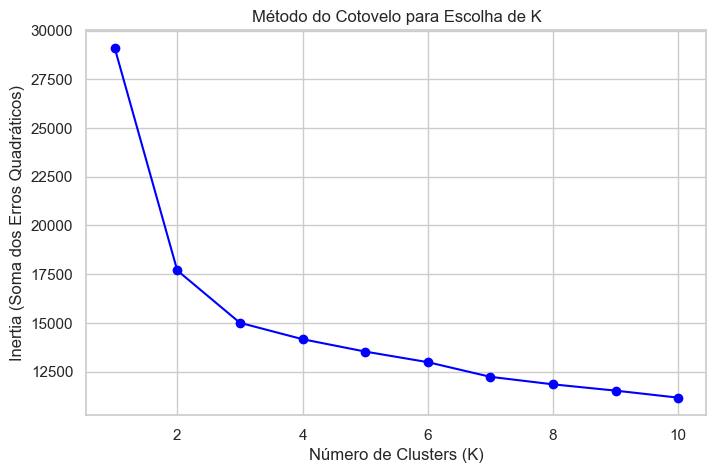

In [ ]:
# Importar bibliotecas necessárias
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Definir a variável de ambiente para silenciar o aviso do joblib
# Limitar o número de núcleos lógicos usados
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

# Carregar o dataset e usar os dados normalizados 
file_path = r'E:\Github\unicamp-engenharia-banco-de-dados\12 - Mineração de Dados\Exercicios\Atividade 2\marketing_campaign.csv'
df = pd.read_csv(file_path, sep='\t')

# Reutilizar as colunas normalizadas 
features_to_scale = ['Year_Birth', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 
                     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
                     'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
X = df_scaled[features_to_scale]

# 3.1 Aplicar o método do cotovelo para determinar o número ideal de clusters (K)
# Lista para armazenar a soma dos erros quadráticos (inertia) para cada valor de K
inertia = []

# Testar valores de K de 1 a 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Criar o gráfico do método do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', color='blue')
plt.title('Método do Cotovelo para Escolha de K')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inertia (Soma dos Erros Quadráticos)')
plt.grid(True)
plt.show()

### Etapa 3.2: Comparar K-Means com init='random' e init='k-means++'

In [15]:
# 3.2 Comparar versões do K-Means com diferentes parâmetros 'init'
# Escolher um valor de K baseado no método do cotovelo (exemplo: K=4)
k = 4

# Instanciar K-Means com init='random'
kmeans_random = KMeans(n_clusters=k, init='random', n_init=10, random_state=42)
kmeans_random.fit(X)
labels_random = kmeans_random.labels_
inertia_random = kmeans_random.inertia_

# Instanciar K-Means com init='k-means++'
kmeans_plus = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
kmeans_plus.fit(X)
labels_plus = kmeans_plus.labels_
inertia_plus = kmeans_plus.inertia_

# Exibir os resultados da comparação
print(f"\nInertia com init='random': {inertia_random}")
print(f"Inertia com init='k-means++': {inertia_plus}")


Inertia com init='random': 14162.143150629432
Inertia com init='k-means++': 14162.625291383345


### Etapa 3.3: Gerar visualização dos clusters formados

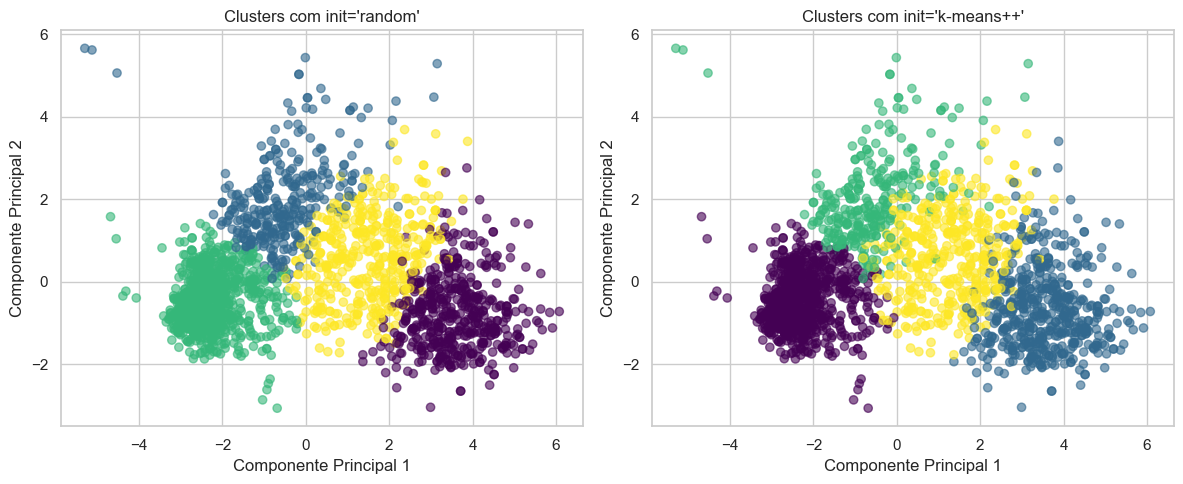

In [16]:
# Importar biblioteca para redução de dimensionalidade
from sklearn.decomposition import PCA

# 3.3 Gerar visualização dos clusters formados
# Reduzir a dimensionalidade para 2D usando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Criar uma figura com dois subplots para comparar os clusters
plt.figure(figsize=(12, 5))

# Gráfico para init='random'
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_random, cmap='viridis', alpha=0.6)
plt.title("Clusters com init='random'")
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Gráfico para init='k-means++'
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_plus, cmap='viridis', alpha=0.6)
plt.title("Clusters com init='k-means++'")
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Ajustar layout e exibir os gráficos
plt.tight_layout()
plt.show()

## 4. Avaliação dos Agrupamentos Obtidos (20%)

### Etapa 4.1: Utilizar o índice de Silhueta para medir a coesão dos clusters

In [ ]:
# Importar bibliotecas necessárias
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Carregar o dataset e usar os dados normalizados 
file_path = r'E:\Github\unicamp-engenharia-banco-de-dados\12 - Mineração de Dados\Exercicios\Atividade 2\marketing_campaign.csv'
df = pd.read_csv(file_path, sep='\t')
features_to_scale = ['Year_Birth', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 
                     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
                     'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
X = df_scaled[features_to_scale]

# 4.1 Utilizar o índice de Silhueta para medir a coesão dos clusters
# Definir o número de clusters (baseado no método do cotovelo, exemplo: K=4)
k = 4

# Aplicar K-Means com init='k-means++'
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
labels = kmeans.fit_predict(X)

# Calcular o índice de Silhueta
silhouette_avg = silhouette_score(X, labels)

# Exibir o resultado
print(f"\nÍndice de Silhueta para K={k} com init='k-means++': {silhouette_avg:.3f}")

# Testar o índice de Silhueta para outros valores de K (opcional)
silhouette_scores = []
for k_test in range(2, 7):  # Testar K de 2 a 6
    kmeans_test = KMeans(n_clusters=k_test, init='k-means++', n_init=10, random_state=42)
    labels_test = kmeans_test.fit_predict(X)
    score = silhouette_score(X, labels_test)
    silhouette_scores.append(score)
    print(f"Índice de Silhueta para K={k_test}: {score:.3f}")


Índice de Silhueta para K=4 com init='k-means++': 0.266
Índice de Silhueta para K=2: 0.383
Índice de Silhueta para K=3: 0.300
Índice de Silhueta para K=4: 0.266
Índice de Silhueta para K=5: 0.162
Índice de Silhueta para K=6: 0.163


### Etapa 4.2: Interpretar os agrupamentos formados e analisar diferenças entre eles

In [18]:
# 4.2 Interpretar os agrupamentos formados e analisar diferenças entre eles
# Adicionar os rótulos dos clusters ao DataFrame original
df['Cluster'] = labels

# Calcular as médias das variáveis por cluster
cluster_means = df.groupby('Cluster')[features_to_scale].mean()

# Exibir as médias por cluster
print("\nMédias das variáveis por cluster:")
print(cluster_means)

# Criar uma análise descritiva simples
print("\nInterpretação dos Clusters:")
for cluster in range(k):
    print(f"\nCluster {cluster}:")
    cluster_data = cluster_means.loc[cluster]
    print(f" - Idade média: {2025 - cluster_data['Year_Birth']:.1f} anos")
    print(f" - Renda média: {cluster_data['Income']:.2f}")
    print(f" - Gasto médio em vinhos: {cluster_data['MntWines']:.2f}")
    print(f" - Gasto médio em carne: {cluster_data['MntMeatProducts']:.2f}")
    print(f" - Número médio de compras com desconto: {cluster_data['NumDealsPurchases']:.2f}")
    print(f" - Número médio de compras na web: {cluster_data['NumWebPurchases']:.2f}")


Médias das variáveis por cluster:
          Year_Birth        Income    MntWines  MntFruits  MntMeatProducts  \
Cluster                                                                      
0        1971.254289  34627.230297   37.511604   4.531786        21.720484   
1        1968.739700  76331.136106  597.265918  72.827715       470.735955   
2        1966.638889  51121.582456  313.774306  10.197917        99.493056   
3        1964.667447  63530.077647  548.793911  29.505855       169.592506   

         MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
Cluster                                                                       
0               6.504541          4.612513     13.947528           1.858729   
1             105.144195         75.500000     81.335206           1.387640   
2              17.239583         11.979167     54.902778           5.593750   
3              38.639344         28.765808     59.817330           2.374707   

         NumWebPurcha

## 5. Discussão e Recomendações (15%)

O texto analisa os resultados do K-Means com quatro grupos de clientes: os "Consumidores Premium" (renda alta, gostam de produtos chiques), os "Jovens Econômicos" (renda baixa, caçam descontos online), as "Famílias Tradicionais" (renda média, compram para o lar) e os "Consumidores Moderados" (renda média, equilibrados nas compras). 

Para cada um, sugere ideias de marketing: ofertas exclusivas para os ricos, promoções online para os jovens, pacotes para famílias e estratégias mistas para os moderados. 

Por fim, aponta que o K-Means tem seus problemas, como dificuldade com outliers e escolha do número de grupos, e recomenda testar outros métodos e usar mais dados, como escolaridade ou histórico de compras, para melhorar os resultados.

É uma base sólida para direcionar o marketing de forma esperta!